In [1]:
import csv
import numpy as np
from numpy import *
import pandas as pd

In [2]:
from github import Github

In [3]:
g = Github("access_token")

In [4]:
g = Github(base_url="https://github.com/Sultan21Offline/Enron-analysis-using-Decision-Tree/blob/master/Enron%20analysis%20using%20Decision%20Tree.ipynb", login_or_token="access_token")

In [5]:
emails_data = pd.read_csv('file:///Users/sultangalymjanuly/Desktop/PythonFINAL/emails.csv')
print(emails_data.shape)
emails_data

(517401, 2)


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...


In [6]:
import PyPDF2 
  
# creating a pdf file object 
pdfFileObj = open('/Users/sultangalymjanuly/Desktop/PythonFINAL/enron61702insiderpay.pdf', 'rb') 
  
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

In [7]:
print(pdfReader.numPages)

10


In [8]:
pageObj = pdfReader.getPage(0) 

In [9]:
print(pageObj.extractText())

In re:   Enron Corp.Case No. 01-16034Payments to InsidersSummary Schedule of all Debtors CombinedEXHIBIT 3b.2PaymentsStock Value  (13)InsiderSalary  (1)Bonus  (2)Long Term Incentive  (3)Deferred Income  (4)Deferral Payments  (5)Loan Advances  (6)Other  (7)Expenses  (8)Director Fees  (9)Total PaymentsExercised Stock Options  (10)Restricted Stock  (11)Restricted Stock Deferred  (12)Total Stock ValueALLEN, PHILLIP K$201,955$4,175,000$304,805($3,081,055)$2,869,717- $152$13,868- $4,484,442$1,729,541$126,027($126,027)$1,729,541BADUM, JAMES P-                        -                        -                        -                        178,980             -                        -                        3,486                 -                        182,466               257,817             -                          -                          257,817               BANNANTINE, JAMES M477                    -                        -                        (5,104)               -         

In [10]:
import pickle
with open("/Users/sultangalymjanuly/Desktop/PythonFINAL/dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [11]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
source_df = pd.DataFrame.from_dict(data_dict, orient = 'index')
source_df.drop('TOTAL',inplace=True)

In [12]:
payments_features = ['salary', 'bonus', 'long_term_incentive',
                     'deferred_income', 'deferral_payments', 'loan_advances',
                     'other', 'expenses', 'director_fees', 'total_payments']
stock_features = ['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred','total_stock_value']

email_features = ['to_messages', 'from_poi_to_this_person',
                  'from_messages', 'from_this_person_to_poi',
                  'shared_receipt_with_poi']
target_field = 'poi'

In [13]:
payments = source_df[payments_features]
payments = payments.replace('NaN', 0)

In [14]:
errors = payments[payments[payments_features[:-1]].sum(axis='columns') != payments['total_payments']]
errors.head()

,salary,bonus,long_term_incentive,deferred_income,deferral_payments,loan_advances,other,expenses,director_fees,total_payments
BELFER ROBERT,0,0,0,0,-102500,0,0,0,3285,102500
BHATNAGAR SANJAY,0,0,0,0,0,0,137864,0,137864,15456290


In [15]:
import numpy as np
shifted_values = payments.loc['BELFER ROBERT', payments_features[1:]].values

expected_payments = shifted_values.sum()
shifted_values = np.append(shifted_values, expected_payments)
payments.loc['BELFER ROBERT', payments_features] = shifted_values

shifted_values = payments.loc['BHATNAGAR SANJAY', payments_features[:-1]].values
payments.loc['BHATNAGAR SANJAY', payments_features] = np.insert(shifted_values, 0, 0)

In [16]:
stocks = source_df[stock_features]
stocks = stocks.replace('NaN', 0)

In [17]:
errors = stocks[stocks[stock_features[:-1]].sum(axis='columns') != stocks['total_stock_value']]
errors.head()

,exercised_stock_options,restricted_stock,restricted_stock_deferred,total_stock_value
BELFER ROBERT,3285,0,44093,-44093
BHATNAGAR SANJAY,2604490,-2604490,15456290,0


In [18]:
shifted_values = stocks.loc['BELFER ROBERT', stock_features[1:]].values

expected_payments = shifted_values.sum()
shifted_values = np.append(shifted_values, expected_payments)
stocks.loc['BELFER ROBERT', stock_features] = shifted_values

shifted_values = stocks.loc['BHATNAGAR SANJAY', stock_features[:-1]].values
stocks.loc['BHATNAGAR SANJAY', stock_features] = np.insert(shifted_values, 0, shifted_values[-1])

In [19]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()

In [20]:
target = source_df[target_field]

email_data = source_df[email_features]
email_data = pd.concat([email_data, target], axis=1)
email_data_poi = email_data[email_data[target_field]][email_features]
email_data_nonpoi = email_data[email_data[target_field] == False][email_features]

email_data_poi[email_features] = imp.fit_transform(email_data_poi)
email_data_nonpoi[email_features] = imp.fit_transform(email_data_nonpoi)
email_data = email_data_poi.append(email_data_nonpoi)

In [21]:
df = payments.join(stocks)
df = df.join(email_data)
df = df.astype(float)

In [22]:
first_quartile = df.quantile(q=0.25)
third_quartile = df.quantile(q=0.75)
IQR = third_quartile - first_quartile
outliers = df[(df > (third_quartile + 1.5 * IQR)) | (df < (first_quartile - 1.5 * IQR))].count(axis=1)
outliers.sort_values(axis=0, ascending=False, inplace=True)
outliers = outliers.head(10)
outliers

LAY KENNETH L         14
FREVERT MARK A        12
LAVORATO JOHN J        8
BELDEN TIMOTHY N       8
SKILLING JEFFREY K     8
BAXTER JOHN C          8
WHALLEY LAWRENCE G     7
KEAN STEVEN J          7
HAEDICKE MARK E        7
DELAINEY DAVID W       6
dtype: int64

In [23]:
target_for_outliers = target.loc[outliers.index]
outliers = pd.concat([outliers, target_for_outliers], axis=1)
non_poi_outliers = outliers[np.logical_not(outliers.poi)]
df.drop(non_poi_outliers.index, inplace=True)


In [24]:
from sklearn.preprocessing import scale
df[df.columns] = scale(df)

In [25]:
target.drop(non_poi_outliers.index, inplace=True)
target = target.map({True: 1, False: 0})
target.value_counts()

0    121
1     18
Name: poi, dtype: int64

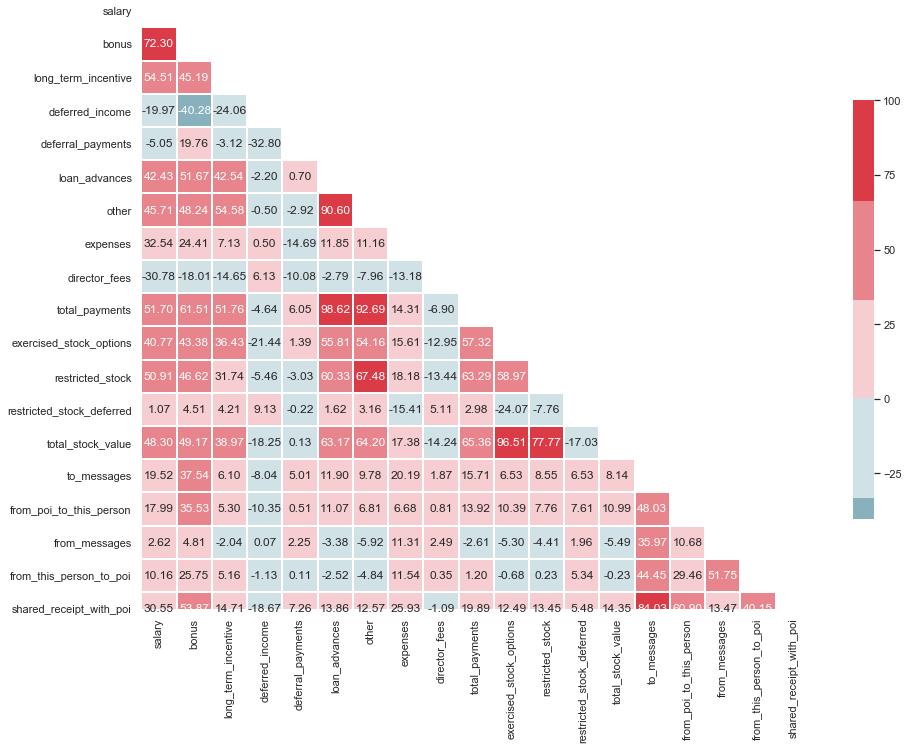

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

corr = df.corr() * 100

# Select upper triangle of correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=1, cbar_kws={"shrink": .7}, annot=True, fmt=".2f")

In [27]:
df.drop(columns=['total_payments', 'total_stock_value'], inplace=True)

In [28]:
df['ratio_of_poi_mail'] = df['from_poi_to_this_person']/df['to_messages']
df['ratio_of_mail_to_poi'] = df['from_this_person_to_poi']/df['from_messages']